In [2]:
from langgraph.graph import StateGraph
from langgraph.graph import START, END
from typing import TypedDict

In [5]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpd: float
    boundary_percent: float
    summary: str
    

In [29]:
def calculate_sr(state:BatsmanState):

    sr=(state['runs']/state['balls'])*100

    

    return {'sr': sr}

In [17]:
def calculate_bpd(state: BatsmanState):

    bpd= state['balls']/(state['fours']+state['sixes'])
    
    return {'bpd': bpd}

In [30]:
def calculate_boundary_percent(state: BatsmanState):
	boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6)) / state['runs']) * 100
	
	return {'boundary_percent': boundary_percent}

In [31]:
def summary(state: BatsmanState):

    summary= f"""

Strike Rate- {state['sr']}\
Balls per Boundary - {state['bpd']} \n
Boundary percent - {state['boundary_percent']}
""" 
    

    return {'summary': summary}

In [32]:
graph= StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpd', calculate_bpd)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)


#edges

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpd')
graph.add_edge(START, 'calculate_boundary_percent')


graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpd','summary')
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary',END)

workflow=graph.compile()

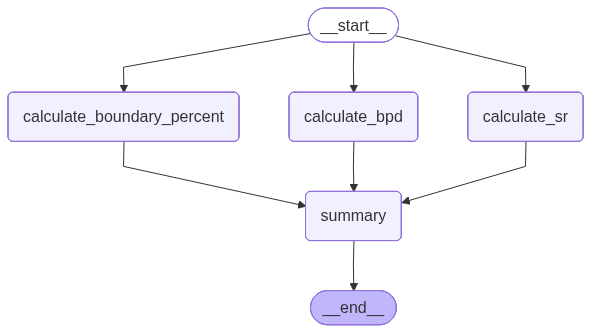

In [33]:
workflow

In [34]:
initial_state= {
    'runs': 100,
    'balls': 60,
    'fours': 8,
    'sixes': 4,
    
}

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 60,
 'fours': 8,
 'sixes': 4,
 'sr': 166.66666666666669,
 'bpd': 5.0,
 'boundary_percent': 56.00000000000001,
 'summary': '\n\nStrike Rate- 166.66666666666669Balls per Boundary - 5.0 \n\nBoundary percent - 56.00000000000001\n'}